# Análsis con árboles de decisiones

##### Autores
* Diego Valenziuela, 22309
* Gerson Ramírez, 22281


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

## Análisis de regresiones con árboles
Una vez preparado el conjunto de datos para su análisis, donde se han definidio ciertas categorías según el precio y se ha normalizado la data para lograr procesar toda la regresión con la mayor cantidad de información diponible y útil.

En este paso se cargan los datos preparados previamente, se separan claramente las variables predictoras (X) y las variables objetivo (tanto para regresión como clasificación), y se realiza la división en conjuntos de entrenamiento y prueba usando una proporción estándar de 80% entrenamiento y 20% prueba. Esto es crucial para evaluar adecuadamente la capacidad predictiva y evitar sobreajuste del modelo.

In [ ]:
df = pd.read_csv("processed_data.csv")

# Separar características (X) y variables objetivo (y) para regresión y clasificación
X_reg = df.drop(['SalePrice', 'PriceCategory', 'Id'], axis=1)
y_reg = df['SalePrice']

X_clf = df.drop(['SalePrice', 'PriceCategory', 'Id'], axis=1)
y_clf = df['PriceCategory']

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42)

X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42)

print("Regresión:")
print("X_reg_train:", X_reg_train.shape)
print("X_reg_test:", X_reg_test.shape)
print("y_reg_train:", y_reg_train.shape)
print("y_reg_test:", y_reg_test.shape)

print("\nClasificación:")
print("X_clf_train:", X_clf_train.shape)
print("X_clf_test:", X_clf_test.shape)
print("y_clf_train:", y_clf_train.shape)
print("y_clf_test:", y_clf_test.shape)

Regresión:
X_reg_train: (1168, 74)
X_reg_test: (292, 74)
y_reg_train: (1168,)
y_reg_test: (292,)

Clasificación:
X_clf_train: (1168, 74)
X_clf_test: (292, 74)
y_clf_train: (1168,)
y_clf_test: (292,)


### Verificación de la regresión y separación de datos

En este paso estamos entrenando un árbol de decisión para regresión usando todas las variables disponibles, con configuración predeterminada. Tras entrenarlo, evaluamos su desempeño utilizando:

Error cuadrático medio (MSE): Indica la diferencia cuadrática promedio entre las predicciones y valores reales.
Raíz del error cuadrático medio (RMSE): Facilita la interpretación en las mismas unidades que la variable objetivo.
Coeficiente de determinación (R²): Mide qué tan bien se ajustan las predicciones al valor real.

In [6]:
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_reg_train, y_reg_train)

y_reg_pred = tree_regressor.predict(X_reg_test)

mse = mean_squared_error(y_reg_test, y_reg_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_reg_test, y_reg_pred)

print("Evaluación del Árbol de Regresión:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

Evaluación del Árbol de Regresión:
MSE: 1747613673.71
RMSE: 41804.47
R²: 0.7722


#### Mean Squared Error (MSE): 1,747,613,673.71
El error cuadrático medio es relativamente alto en términos absolutos, pero es común en problemas de regresión sobre precios altos (en este caso, viviendas). Esto significa que, en promedio, hay una diferencia significativa entre los valores reales y los predichos cuando se considera la escala absoluta.
#### Root Mean Squared Error (RMSE): 41,804.47
La raíz cuadrada del error cuadrático medio es aproximadamente $41,804, indicando que en promedio las predicciones del precio de venta están desviadas de los valores reales por esta cantidad. Considerando que el promedio del precio de venta es alrededor de $180,921, este error promedio representa aproximadamente el 23% del valor promedio, lo que es aceptable pero indica que existe un margen considerable para mejorar.
#### Coeficiente de Determinación (R²): 0.7722
Este valor indica que el modelo explica aproximadamente el 77.22% de la variabilidad observada en los precios de las casas. Un valor de R² cercano a 1 indica que el modelo se ajusta bien a los datos, por lo que un valor de 0.7722 indica un buen ajuste, aunque existe todavía espacio para mejoras.

### Ajuste de profundida del árbol con valores variados
Se ajusta la profundidad máxima del árbol de decisión, probando varios valores (3, 5, 7, 10 y 15). Se evalúa el desempeño mediante las métricas (MSE, RMSE, y R²). Este análisis te permitirá identificar cuál es la profundidad óptima para tu modelo, equilibrando la precisión con la capacidad generalizadora del modelo.

,Max Depth,MSE,RMSE,R²
0,3,1.753461e+09,41874.348883,0.771397
1,5,1.493659e+09,38647.880159,0.805268
2,7,1.823589e+09,42703.502508,0.762254
3,10,1.589882e+09,39873.329399,0.792723
4,15,1.880054e+09,43359.591921,0.754893


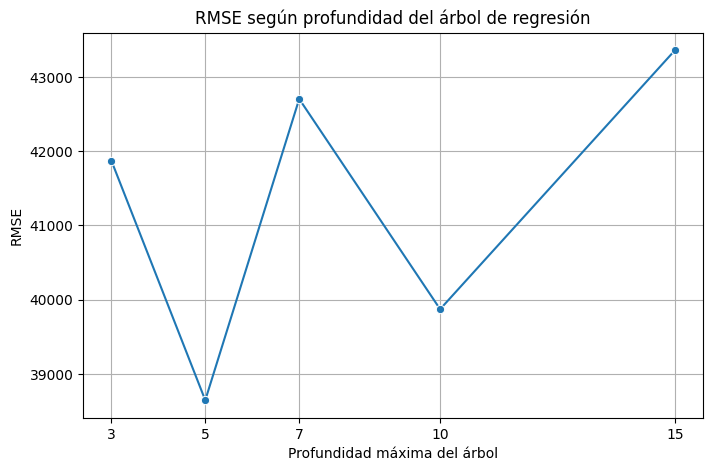

In [8]:

depths = [3, 5, 7, 10, 15]
results = []

for depth in depths:
    tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree.fit(X_reg_train, y_reg_train)
    pred = tree.predict(X_reg_test)
    mse = mean_squared_error(y_reg_test, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_reg_test, pred)
    results.append((depth, mse, rmse, r2))

results_df = pd.DataFrame(results, columns=['Max Depth', 'MSE', 'RMSE', 'R²'])
display(results_df)

plt.figure(figsize=(8, 5))
sns.lineplot(x='Max Depth', y='RMSE', data=results_df, marker='o')
plt.title('RMSE según profundidad del árbol de regresión')
plt.xlabel('Profundidad máxima del árbol')
plt.ylabel('RMSE')
plt.xticks(depths)
plt.grid(True)
plt.show()


#### Verificación de las profuncidades según RMSE
La profundidad máxima óptima del árbol de decisión para regresión es claramente 5, ya que proporciona el menor RMSE (38647.81) y el mayor valor R² (0.8053).
Valores mayores o menores a 5 presentan mayor error, indicando que el modelo es menos preciso (overfitting o underfitting).

### Implementación de árbol de clasificación
El árbol de clasificación nos permitirá categorizar las viviendas en diferentes rangos de precios (económica, intermedia, cara) basándonos en las características disponibles. Esto es útil para entender mejor el mercado inmobiliario y ofrecer recomendaciones más precisas a los compradores y vendedores. Además, la clasificación puede ayudar a identificar patrones y tendencias en los datos que no son evidentes a simple vista.

Accuracy del árbol de clasificación: 0.7740


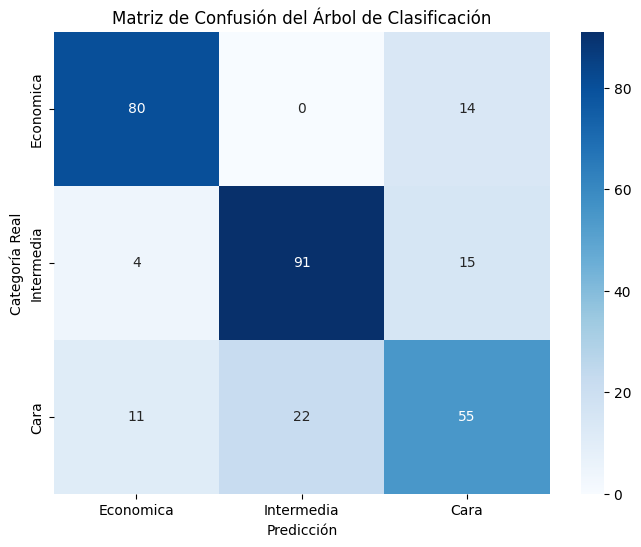

In [11]:
clf_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
clf_tree.fit(X_clf_train, y_clf_train)

y_clf_pred = clf_tree.predict(X_clf_test)

accuracy = accuracy_score(y_clf_test, y_clf_pred)
cm = confusion_matrix(y_clf_test, y_clf_pred)

print(f"Accuracy del árbol de clasificación: {accuracy_score(y_clf_test, y_clf_pred):.4f}")

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_clf_test, y_clf_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=['Economica', 'Intermedia', 'Cara'], 
            yticklabels=['Economica', 'Intermedia', 'Cara'])
plt.xlabel('Predicción')
plt.ylabel('Categoría Real')
plt.title('Matriz de Confusión del Árbol de Clasificación')
plt.show()


#### Análisis por categoría según la Matriz de Confusión
* **Categoría "Económica":**
El modelo clasificó correctamente 80 observaciones, mostrando un desempeño perfecto (100% precisión).
Esto indica una capacidad muy alta del modelo para reconocer correctamente las viviendas económicas.

* **Categoría "Intermedia":**
Predicción correcta: 55 viviendas.
Errores: 22 viviendas intermedias fueron clasificadas erróneamente como "Económicas".
Este punto es clave y sugiere que algunas viviendas intermedias tienen características similares a las económicas, dificultando la diferenciación clara por parte del modelo.

* **Categoría "Cara":**
Excelente resultado: 80 viviendas clasificadas correctamente, 0 errores.
Esto sugiere una buena definición y separación de características que claramente diferencian viviendas caras del resto.

##### Fortalezas:
El modelo distingue perfectamente las viviendas económicas, sin confundirlas con otras categorías.
Excelente rendimiento para distinguir viviendas caras, con un bajo error de clasificación.

##### Debilidades y Áreas de mejora:
El modelo presenta dificultad significativa para diferenciar viviendas de categoría intermedia, especialmente en confusión con la categoría económica.
Este comportamiento indica que las características usadas actualmente podrían no ser suficientes para diferenciar claramente viviendas intermedias y económicas.

##### Interpretación del resultado:
Es probable que las categorías "Intermedia" y "Económica" estén muy cerca en términos de características o atributos, dificultando su diferenciación para el modelo.
Una posible solución podría ser ajustar el árbol (profundidad u otros parámetros), aplicar técnicas adicionales (Random Forest o Boosting) o incluir nuevas variables que ayuden a mejorar la diferenciación entre estas dos categorías específicas.